# CAPSTONE PROJECT: GENRE CLASSIFICATION

### Modeling & Hyperparameter Optimization 
Stephanie Barrett | September 5, 2023

This project aims to use machine learning to classify songs into the correct genre based on particular attributes. 

**Introduction:** This is notebook 3 of 4 that was used in the genre classification project. This notebook contains several sets of baseline modeling (on a dataset containing 113 genres, another containing 85 genres and another containing 8 genres). It also contains several gridsearches and the optimization of parameters for different datasets and models. The csv files uploaded in this notebook are the cleaned DataFrame(s) from previous notebooks. 
***
**TABLE OF CONTENTS**

[Introduction](#Modeling-&-Hyperparameter-Optimization)

[Loading and Checking our Cleaned Data](#LOADING-AND-CHECKING-OUR-CLEANED-DATA)

[Baseline Models - 113 Genres](#BASELINE-MODELS)

[Baseline Models - 85 Genres](#BASELINE-MODELS---85-GENRES)

[Hyperparameter Optimization of Random Forest Model](#HYPERPARAMETER-OPTIMIZATION-OF-RANDOM-FOREST)

[Combining Datasets for Total of 8 Genres](#COMBINING-DATASETS-FOR-A-TOTAL-OF-8-GENRES) 

[Conclusions & Next Steps](#CONCLUSIONS-AND-NEXT-STEPS)

***

#### LOADING AND CHECKING OUR CLEANED DATA 

Let's run some baseline models on our spotify_cleaned dataset. This will give us a good jumping off point and help us see what classifiers we might want to gravitate towards and/or optimize going forward. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading in our cleaned dataset
spotify= pd.read_csv('~/Desktop/CapstoneProject/data/spotify_cleaned_final.csv')

In [3]:
# shape of our cleaned dataset 
spotify.shape

(81343, 21)

In [4]:
# All of our features 
spotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
# top of the data
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We have a second index. Let's read in our data one more time setting the 1st column as the index. 

In [6]:
# Renaming index 
spotify = pd.read_csv('~/Desktop/CapstoneProject/data/spotify_cleaned_final.csv', index_col=0)

In [7]:
# Sanity check 
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
# making a copy of the cleaned data 
spotify_original = spotify.copy()

In [9]:
# Grabbing our independent variables 
spotify = spotify.iloc[:,4:]

In [10]:
# Sanity check
spotify.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [11]:
spotify.shape

(81343, 16)

### BASELINE MODELS 

Without scaling our data or optimizing any hyperparameters, we are going to run a few baseline models. These include: Logistic Regression, Decision Tree and Random Forest.

#### BASELINE LOGISTIC REGRESSION MODEL - 113 GENRES

In [12]:
#Baseline model 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train test split 
X = spotify.select_dtypes(exclude='object')
y = spotify['track_genre']

In [13]:
X.shape

(81343, 15)

In [14]:
y.shape

(81343,)

In [15]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [16]:
# shape of our splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(65074, 15) (16269, 15) (65074,) (16269,)


In [17]:
# Instatiate model 
baseline_log = LogisticRegression(max_iter=10000)

# Fit the model 
baseline_log.fit(X_train, y_train)

# Score on training data 
print(baseline_log.score(X_train, y_train))

# Score on testing data 
print(baseline_log.score(X_test, y_test))

0.04812982143405969
0.04714487675948122


For our baseline logistic regression model, both scores are extremely low which is a clear sign of underfitting. The baseline model hasn't picked up on any relationship between our features and genre. 

We have some hyperparameters we can optimize, but given that the scores are both so low, running a couple non-linear models and consolidating genres would be good first steps. A logistic regression model might not be the best model for this data. 

| Baseline Model      | Train Score | Test Score |
|---------------------|-------------|------------|
| Logistic Regression | 4.8%        | 4.7%       |
|                     |             |            |            

#### BASELINE DECISION TREE - 113 GENRES

In [18]:
from sklearn.tree import DecisionTreeClassifier

# instantiate model 
baseline_DT = DecisionTreeClassifier()

# fit model 
baseline_DT.fit(X_train, y_train)

print(baseline_DT.score(X_train, y_train))
print(baseline_DT.score(X_test, y_test))

0.999984632879491
0.2512139652099084


Although this baseline decision tree scored better on the test data, there is an extremely large distance between the train and test scores indicating a severe amount of overfitting. Setting the max_depth parameter, among others, can help reduce the amount of overfitting.

| Baseline Model      | Train Score | Test Score |
|---------------------|-------------|------------|
| Logistic Regression | 5.1%        | 4.7%       |
| Decision Tree       | 99.9%       | 25.1%      |     

#### BASELINE RANDOM FOREST - 113 GENRES

A random forest model should perform better than our decision tree since it will avereage the results of many trees. We will use the default number of trees - 100. These tend to work better "out of the box" because each tree is trained on a different subset of the data. For now, let's use default parameters, but going forward, if we choose to use this model, we can change these hyperparamters. 


In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100) # setting max features is not needed here as our dataset only has 2 features.
random_forest_model.fit(X_train, y_train)

print(random_forest_model.score(X_train, y_train))
print(random_forest_model.score(X_test, y_test))

0.999984632879491
0.4040199151761018


| Baseline Model      | Train Score | Test Score |
|---------------------|-------------|------------|
| Logistic Regression | 5.1%        | 4.7%       |
| Decision Tree       | 99.9%       | 25.1%      | 
| Random Forest       | 99.9%       | 40.4%      | 

As expected, our train score has icreased, but more importantly, our test score has increased by 15% to 40.5%. This is our highest score yet, but we still see a fair amount of overfitting.  

Let's also run a KNN. 

#### BASELINE KNN - 113 GENRES

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

print("Number of neighbors: ", knn_model.n_neighbors)
print("Train Accuracy: ", knn_model.score(X_train, y_train))
print("Test Accuracy: ", knn_model.score(X_test, y_test))


Number of neighbors:  5
Train Accuracy:  0.25610843040231124
Test Accuracy:  0.031470895568258654


| Baseline Model      | Train Score | Test Score |
|---------------------|-------------|------------|
| Logistic Regression | 5.1%        | 4.8%       |
| Decision Tree       | 99.9%       | 25.0%      | 
| Random Forest       | 99.9%       | 40.8%      | 
| KNN                 | 25.6%       | 3.1%       | 

**Conclusion:** Our logistic regression model had the lowest train and test score followed our KNN. Although our decision tree tested significantly better, the Random Forest performed the best due to its averaging of the results of an ensemble of trees. 

Although a total of 113 genres is representative of what exists in the industry, reducing the number of classes we have in our target variable may help with the test performance of our model. Going forward, it looks as though our best choice in models is the Random Forest, however, let's continue to compare performance of baseline models on the above classifiers. Refer to notebok 2 to see how and why we reduced genres. 

Next, we will run baseline models on a reduced dataset that contains 85 genres. 

#### BASELINE MODELS - 85 GENRES

In notebook 2, we created a consolidated_genres csv file that contains a smaller dataset with the genres that we either didn't have a metric for (i.e. happy, sad, french, german) or that were overlapping with other genres removed. We ended up with a total of 85 genres. Let's read in this smaller dataset and run the same baseline models. 

In [21]:
# Reading in our dataset 
consolidated_genres_1 = pd.read_csv('~/Desktop/CapstoneProject/data/consolidated_spotify.csv')

In [22]:
# Sanity Check 
consolidated_genres_1. head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


In [23]:
# Set column 1 as index
consolidated_genres_1 = pd.read_csv('~/Desktop/CapstoneProject/data/consolidated_spotify.csv', index_col=0)

In [24]:
# Sanity check 
consolidated_genres_1.head(1)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


In [25]:
print(f'This dataset contains a total of {consolidated_genres_1.shape[0]} rows and {consolidated_genres_1.shape[1]} columns ')

This dataset contains a total of 59721 rows and 20 columns 


In [26]:
# Total number of genres - 85
consolidated_genres_1['track_genre'].nunique()

85

Since we are using a new dataset, let's perform our train-test split again. 

In [27]:
# Splitting our independent variables from our target variable, genre 
X = consolidated_genres_1.select_dtypes(exclude='object')
y = consolidated_genres_1['track_genre']

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Shape of our splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(47776, 15) (11945, 15) (47776,) (11945,)


In [28]:
# Sanity check 
X_train.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
12053,56,259079,0,0.563,0.488,11,-7.314,1,0.0349,0.33200,0.000000,0.1870,0.262,139.987,4
71671,61,251533,0,0.316,0.729,2,-5.931,0,0.0356,0.02030,0.000009,0.2070,0.367,163.127,4
38240,33,119386,0,0.551,0.859,2,-5.364,1,0.0552,0.50300,0.832000,0.0911,0.889,92.920,4
28657,44,261126,0,0.466,0.891,7,-2.712,0,0.0344,0.00233,0.025800,0.1230,0.406,93.026,4
103507,76,177466,0,0.855,0.587,8,-4.589,1,0.0336,0.05050,0.007140,0.1050,0.640,111.970,4


In [29]:
# Sanity check 
y_train.head(5)

12053     cantopop
71671        metal
38240       garage
28657          dub
103507        soul
Name: track_genre, dtype: object

We are now ready to re-run our baseline models on this smaller dataset. Once we have the scores of each model, we will compare performance between the dataset containing 113 genres and the dataset containing 85 genres. 

#### BASELINE LOGISTIC REGRESSION - 85 GENRES

In [30]:
# Instatiate model 
baseline_consolidated_log_1 = LogisticRegression(max_iter=10000)

# Fit the model 
baseline_consolidated_log_1.fit(X_train, y_train)

# Score on training data 
print(baseline_consolidated_log_1.score(X_train, y_train))

# Score on testing data 
print(baseline_consolidated_log_1.score(X_test, y_test))

0.056974212993971866
0.054834658853076604


| Baseline Model - 85 Genres     | Train Score | Test Score |   
|--------------------------------|-------------|------------|
| Logistic Regression            | 5.7%        | 5.5%       |
|                                |             |            | 
|                                |             |            | 

#### BASELINE DECISION TREE - 85 GENRES

In [31]:
# instantiate model 
baseline_consolidated_DT = DecisionTreeClassifier()

# fit model 
baseline_consolidated_DT.fit(X_train, y_train)

print(baseline_consolidated_DT.score(X_train, y_train))
print(baseline_consolidated_DT.score(X_test, y_test))

1.0
0.26680619506069486


| Baseline Model - 85 Genres     | Train Score | Test Score |   
|--------------------------------|-------------|------------|
| Logistic Regression            | 5.7%        | 5.5%       |
| Decision Tree                  | 100%        | 26.7%      | 
|                                |             |            | 

#### BASELINE RANDOM FOREST - 85 GENRES

In [32]:
random_forest_consolidated_model = RandomForestClassifier(n_estimators=100) # setting max features is not needed here as our dataset only has 2 features.
random_forest_consolidated_model.fit(X_train, y_train)
 
#plot_decision_regions(X_train, y_train, clf=random_forest_model);

print(random_forest_consolidated_model.score(X_train, y_train))
print(random_forest_consolidated_model.score(X_test, y_test))

1.0
0.4267894516534115


| Baseline Model - 85 Genres     | Train Score | Test Score |   
|--------------------------------|-------------|------------|
| Logistic Regression            | 5.7%        | 5.5%       |
| Decision Tree                  | 100%        | 27.0%      | 
| Random Forest                  | 100%        | 42.7%      | 
|                                |             |            |

#### BASELINE KNN - 85 GENRES 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_consolidated_model = KNeighborsClassifier()
knn_consolidated_model.fit(X_train, y_train)

print("Number of neighbors: ", knn_consolidated_model.n_neighbors)
print("Train Accuracy: ", knn_consolidated_model.score(X_train, y_train))
print("Test Accuracy: ", knn_consolidated_model.score(X_test, y_test))


Number of neighbors:  5
Train Accuracy:  0.26856580709979905
Test Accuracy:  0.039598158225198826


| Baseline Model - 85 Genres     | Train Score | Test Score |   
|--------------------------------|-------------|------------|
| Logistic Regression            | 5.7%        | 5.5%       |
| Decision Tree                  | 100%        | 27.0%      | 
| Random Forest                  | 100%        | 42.6%      | 
| KNN                            | 26.9%       | 4.0%       |

| Baseline Model - 113 Genres | Train Score | Test Score |
|-----------------------------|-------------|------------|
| Logistic Regression         | 5.1%        | 4.8%       |
| Decision Tree               | 99.9%       | 25.0%      | 
| Random Forest               | 99.9%       | 40.8%      | 
| KNN                         | 25.6%       | 3.1%       | 

**Conclusion**: The elimination of 29 genres made a small, but positive difference in the performance of each of our baseline models. As expected, the Random Forest model continued to out-perform the others. Before we try our last option (using only 7-8 genres), let's see if we can optimize our Random Forest model while keeping all 85 genres. It could be that our attributes don't provide enough information to make distinctions between similar genres, but let's scale our data, consider reducing the dimensions of our dataset, and run a pipeline and gridsearch on a Random Forest model to see if we can improve its performance by optimizing the hyperparameters. 

### HYPERPARAMETER OPTIMIZATION OF RANDOM FOREST

First, we can split our 85-genre dataset once again, but this time into validation and test sets.

In [35]:
# Separating independent and dependent variables 
X = consolidated_genres_1.select_dtypes(exclude='object')
y = consolidated_genres_1['track_genre']

# Remainder/test split 
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# shape of our splits - should match that of our split for baseline models 
print(X_remainder.shape, X_test.shape, y_remainder.shape, y_test.shape)

(47776, 15) (11945, 15) (47776,) (11945,)


Since we'll be a GridSearch, there is no need to further split our X_remainder and y_remainder into test and validation, the cross-validation will do that for us. However, in order to scale our data without having to apply a scaler to each indivudal fold, let's use a pipeline to scale and reduce the dimensions of our data. 

Based on the work in our clustering notebook, we saw that MinMax scaler combined with a PCA provided the most potential separation of the data, so let's use those in our pipeline and use a GridSearch to choose the best n_components for the PCA and the remaining hyperparameters of our Random Forest. 

Before we do run a GridSearch, let's find the possible values for n_estimators and max_features of our Random Forest. This will reduce the number of values we put in our GridSearch for each hyperparameter reducing the run time. 

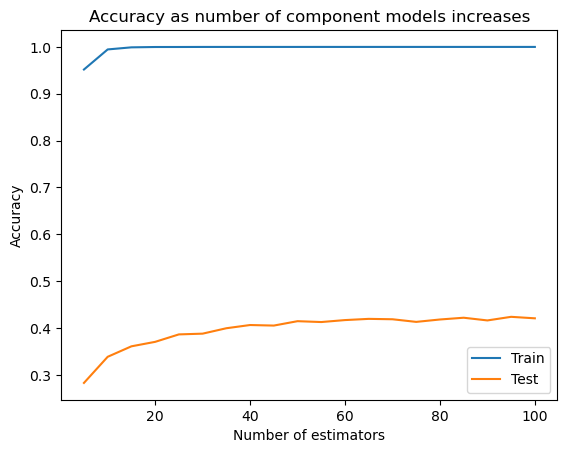

In [36]:
train_scores = []
test_scores = []
n_range = range(5, 101, 5)
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = n)
    RF_model.fit(X_remainder, y_remainder)
    train_scores.append(RF_model.score(X_remainder, y_remainder))
    test_scores.append(RF_model.score(X_test, y_test))
    
plt.plot(n_range, train_scores, label = 'Train')
plt.plot(n_range, test_scores, label = 'Test')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy as number of component models increases")
plt.legend();

It is not shown, but we ran the above cell with an n_range that went up to 200. We didn't see much difference in the test score (around 40% - similar to our baseline model), so we reduced the range down to 100 for readability and chose the smallest value at 40% accuracy, `n_estimator=70`,  so that we don't put unnecessary values in our GridSearch. 

In [37]:
# Our above RF_model had a default of 100 trees. 
# Let's look at the max_depth for each tree
depths = [estimator.tree_.max_depth for estimator in RF_model.estimators_]

In [38]:
depths = np.array(depths)

In [39]:
# Depths of our Random Forest 
np.unique(depths)

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44])

Another hyperparameter that we can optimize in Decision Tree and Random Forest models is the `max_depth`. When not specified, the tree expands until all leaves are pure. Although the averaging of many trees, on its own, reduces the amount of overfitting and we don't necessarily need this hyperparameter set, let's see if we can find some possible values of `max_depth` by running a for loop on a range of values and comparing accuracy scores. 

In [47]:
test_acc = []
train_acc = []


for depth in range(1,41): 
    #Fit to the training data
    RF_model = RandomForestClassifier(max_depth=depth)
    RF_model.fit(X_remainder, y_remainder)
    
    print(f"DEPTH: {depth}")
    print(f"The TRAIN classification accuracy is:  {RF_model.score(X_remainder,y_remainder)}")
    train_acc.append(RF_model.score(X_remainder,y_remainder))
    print(f"The TEST classification accuracy is:  {RF_model.score(X_test,y_test)}", "\n\n")
    test_acc.append(RF_model.score(X_test,y_test))

DEPTH: 1
The TRAIN classification accuracy is:  0.10871567314132619
The TEST classification accuracy is:  0.1088321473419841 


DEPTH: 2
The TRAIN classification accuracy is:  0.15417782987273945
The TEST classification accuracy is:  0.15236500627877772 


DEPTH: 3
The TRAIN classification accuracy is:  0.19373744139316812
The TEST classification accuracy is:  0.18627040602762662 


DEPTH: 4
The TRAIN classification accuracy is:  0.24826272605492297
The TEST classification accuracy is:  0.2385935537881959 


DEPTH: 5
The TRAIN classification accuracy is:  0.2891619223040857
The TEST classification accuracy is:  0.2743407283382168 


DEPTH: 6
The TRAIN classification accuracy is:  0.3203700602813128
The TEST classification accuracy is:  0.2966094600251151 


DEPTH: 7
The TRAIN classification accuracy is:  0.3544248158070998
The TEST classification accuracy is:  0.32113855169527 


DEPTH: 8
The TRAIN classification accuracy is:  0.3859469189551239
The TEST classification accuracy is:  0.

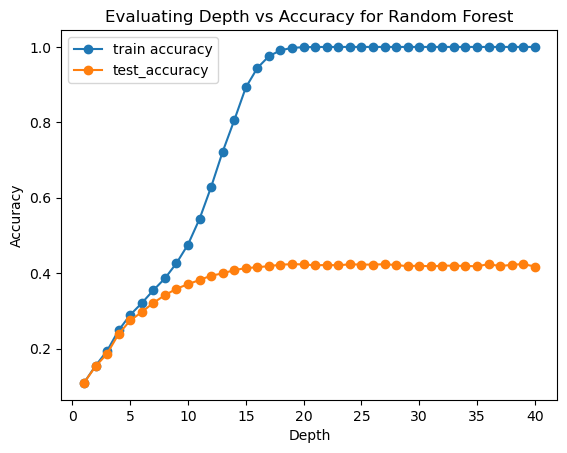

In [48]:
plt.plot(range(1,41), train_acc, marker="o", label="train accuracy") 
plt.plot(range(1,41), test_acc, marker="o", label="test_accuracy")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Evaluating Depth vs Accuracy for Random Forest")
plt.show()

The print statements and line graph above show us that around 8-10 are the values of max_depth that get us our highest score before the model starts to overfit. 

We can include a range between 8-10 in for the max_depth parameter in our grid search to find the best performance without overfitting. 

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 

estimators = [
              ('normalize', MinMaxScaler()),
              ('reduce_dim', PCA()),
              ('rf_model', RandomForestClassifier(n_estimators=70))
             ]

pipe = Pipeline(estimators)

params = {'normalize': [MinMaxScaler(), StandardScaler(), None],
          'reduce_dim__n_components': [3,7],
          'rf_model__max_features': ['sqrt', 'log2', None],
          'rf_model__min_samples_leaf': [1,2,3], 
          'rf_model__max_depth': [8,9,10, None]}

grid = GridSearchCV(pipe, params, cv=5)
fittedgrid = grid.fit(X_remainder, y_remainder)

In [41]:
fittedgrid.best_params_

{'normalize': None,
 'reduce_dim__n_components': 7,
 'rf_model__max_depth': None,
 'rf_model__max_features': 'sqrt',
 'rf_model__min_samples_leaf': 3}

In [43]:
estimators = [('reduce_dim', PCA(n_components=7)), # run grid search again with both StandardScaler and MinMaxScaler
              ('rf', RandomForestClassifier(max_features=2, min_samples_leaf=3, n_estimators=70))]

pipe = Pipeline(estimators)

pipe.fit(X_remainder, y_remainder)
print(f'train score: {pipe.score(X_remainder,y_remainder)}')
print(f'test score: {pipe.score(X_test, y_test)}')

train score: 0.9612357669122572
test score: 0.29769778149853493


The best parameters from our grid search are above. Let's now run a adjust our pipeline and run the model again using the best parameters.

In [44]:
estimators = [
              ('normalise', StandardScaler()), 
              ('rf', RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=2, n_estimators=70))
             ]

pipe = Pipeline(estimators)

pipe.fit(X_remainder, y_remainder)
print(f'train score: {pipe.score(X_remainder,y_remainder)}')
print(f'test score: {pipe.score(X_test, y_test)}')

train score: 0.3438965170797053
test score: 0.3166178317287568


We can see that the best accuracy score we can get is a train score of 34.4% and a 30.2% before the model begins to overfit. 

Although having 85 genres made it difficult for any of our models to yield high accuracy rates, it is probably more representative of what exists - or a fraction of what exists - on any streaming platform. We did see a tiny increase in accuracy rates when we reduced the genres from 113 to 85. Using neural networks on a dataset that contains these features, but also contains sound clips or graphical representations of each song could be a better way to try and classify into genre for future analysis. For the sake of our experiment, let's see how our classifiers would perform on a dataset containing only 8 distinct genres. 

To achieve a sizeable dataset, let's combine 2 spotify datasets before modeling. 

### COMBINING DATASETS FOR A TOTAL OF 8 GENRES 

At the beginning of this project, we found and cleaned 2 datasets. One of them is the dataset we have been using thus far in our analysis and modeling. The other dataset was a smaller dataset that included genre labels, but only had a total of 8 genres. The genres were more in line with what we were thinking when we meant parent genres. It is definitely possible to see some overlap between them, but they are distinctive enough from one another that we might yield better results. 

Because the dataset was so small, let's see what genres we have in our larger dataset that match those 8 genres and what other genres we can combine. Once we have selected the ones to keep, we can save those to a new DataFrame and concatenate the two together to create one new DataFrame of songs that belong 8 genres. 

Let's start by reading both datasets in and doing some basic cleaning and EDA. 

In [40]:
# Smaller dataset containing 8 genres 
spotify_1 = pd.read_csv('~/Desktop/CapstoneProject/data/smaller_spotify_cleaned.csv', index_col=0)

In [41]:
# Larger dataset containing 85 genres
spotify_2 = pd.read_csv('~/Desktop/CapstoneProject/data/consolidated_spotify_updated.csv', index_col=0)

In [42]:
spotify_1.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
565,0.213,0.06560,7.0,-24.810,1.0,0.0467,0.992,0.969,0.0699,0.0384,65.023,3U8Fx7zNTQrctytkj6Gqgd,150147.0,3.0,Carnival of the Animals: The Swan,Camille Saint-Sa?ns,classical
566,0.368,0.00363,1.0,-36.759,1.0,0.0350,0.993,0.922,0.1370,0.0850,69.363,1L4NadMj3Jj7YgGaikyhfr,254000.0,3.0,"6 Consolations, S. 172: No. 3 In D Flat Major ...",Franz Liszt,classical
567,0.701,0.34100,1.0,-12.260,0.0,0.0418,0.499,0.903,0.3590,0.1630,105.513,5xbuJuQsTVheVZvX2AJVIv,151507.0,3.0,"Recomposed By Max Richter: Vivaldi, The Four S...",Max Richter,classical
568,0.392,0.05360,4.0,-23.399,1.0,0.0571,0.995,0.867,0.0808,0.0417,71.286,6YDgMoJ8ssOuKjQ6jiz4Kk,234467.0,4.0,"12 ¨¦tudes, Op. 10: No. 3 in E Major",Fr¨¦d¨¦ric Chopin,classical
569,0.330,0.00274,2.0,-37.342,0.0,0.0617,0.992,0.908,0.0668,0.1880,61.088,4tKmydUDl8OIeb7fioEsnl,143532.0,4.0,Sonata No. 42 in D Minor (Arr. ¨®lafsson),Domenico Cimarosa,classical


In [43]:
spotify_2.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We will be basing our new set of genres on the unique genres that exist in spotify_1. 

In [44]:
# Unique genres in the smaller dataset 
spotify_1['genre'].unique()

array(['classical', 'electronic', 'folk', 'hiphop', 'jazz', 'popular',
       'rnb', 'rock'], dtype=object)

Our genres are: 
- classical 
- electronic
- folk
- hip-hop
- jazz
- popular(pop)
- rnb
- rock

In [45]:
spotify_1.shape

(8800, 17)

### Comparing, Combining and Deleting Genres from Spotify_2

In [46]:
# Number of unique genres in our larger dataset 
spotify_2['track_genre'].nunique()

85

In [47]:
# List of 85 genres
spotify_2['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'breakbeat',
       'cantopop', 'chicago-house', 'classical', 'club', 'country',
       'dance', 'reggae_dancehall', 'death-metal', 'deep-house',
       'detroit-techno', 'disco', 'drum-and-bass', 'dub', 'dubstep',
       'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'funk',
       'garage', 'gospel', 'goth', 'grindcore', 'grunge', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk',
       'house', 'idm', 'indie-pop', 'indie', 'industrial', 'j-dance',
       'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'mandopop', 'metal',
       'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode',
       'pop', 'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggaeton', 'rock-n-roll', 'rock', 'rockabilly',
       'salsa', 'samba', 'sertanejo', 'show-tunes', 'singer-songwriter',
       '

In [48]:
# Adjusting amount of rows we can view in an output 
pd.set_option('display.max_rows', 100)

In [49]:
# Looking at count of songs in each genre 
spotify_2['track_genre'].value_counts() 

reggae_dancehall     999
black-metal          991
heavy-metal          985
bluegrass            978
forro                968
grindcore            965
idm                  958
chicago-house        956
breakbeat            955
cantopop             955
new-age              953
afrobeat             953
club                 946
anime                942
acoustic             941
ambient              937
tango                935
salsa                926
detroit-techno       920
j-idol               915
deep-house           915
drum-and-bass        915
hardstyle            880
world-music          880
death-metal          878
dub                  877
goth                 873
garage               868
emo                  866
trip-hop             861
k-pop                854
show-tunes           851
minimal-techno       845
mandopop             843
power-pop            833
honky-tonk           826
pagode               819
opera                809
industrial           809
electronic           808


Based on the counts above, it seems like pop and rock are the only genres in our larger dataset with extremely low count of songs. Let's combine the asian pop genres with pop. Let's also look at the artists of songs that are considered 'rock' in the smaller dataset to gauge what we rock genres we can combine in our larger dataset.

In [50]:
# Looking at rock artists in the smaller dataset, spotify_1
spotify_1.loc[spotify_1['genre'] == 'rock']

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
8790,0.310,0.700,9.0,-5.678,1.0,0.0470,0.011000,0.009650,0.0828,0.763,188.386,08mG3Y1vljYA6bvDt4Wqkj,255493.0,4.0,Back In Black,AC/DC,rock
8791,0.273,0.952,11.0,-8.762,1.0,0.0843,0.016900,0.011100,0.1420,0.472,100.271,3YBZIN3rekqsKxbJc9FZko,405640.0,4.0,Paradise City,Guns N' Roses,rock
8792,0.933,0.528,5.0,-6.472,0.0,0.1620,0.112000,0.329000,0.1630,0.756,109.975,57JVGBtBLCfHw2muk5416J,214653.0,4.0,Another One Bites The Dust - Remastered 2011,Queen,rock
8793,0.307,0.433,1.0,-10.057,1.0,0.0290,0.388000,0.000091,0.3320,0.224,160.900,5MxNLUsfh7uzROypsoO5qe,266960.0,4.0,Dream On,Aerosmith,rock
8794,0.515,0.430,7.0,-9.935,1.0,0.0372,0.009700,0.000133,0.1290,0.104,91.844,70LcF31zb1H0PyJoS1Sx1r,238640.0,4.0,Creep,Radiohead,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,0.557,0.533,10.0,-6.817,0.0,0.0252,0.049200,0.000000,0.2050,0.233,143.994,3NLrRZoMF0Lx6zTlYqeIo4,238733.0,4.0,Here Without You,3 Doors Down,rock
10123,0.450,0.525,3.0,-6.893,1.0,0.0271,0.522000,0.000002,0.2540,0.371,187.525,2Qdnk7tbc4onLOIPd1eSNE,232200.0,3.0,When You're Gone,The Cranberries,rock
10125,0.469,0.561,9.0,-7.596,1.0,0.0251,0.008710,0.000005,0.3370,0.356,87.629,39aRmixB9qNtCU2t8BmsC1,302787.0,4.0,One Of Us - Short Version,Joan Osborne,rock
10128,0.391,0.815,9.0,-6.197,1.0,0.0518,0.017700,0.002260,0.2760,0.647,84.383,0pUVeEgZuNyFzIMKp67RbS,299240.0,4.0,Eyes Without A Face,Billy Idol,rock


Just from looking at the top of the above output, we can see artists that don't span many genres like Radiohead, Aerosmith and Guns N' Roses. Let's search for these artists in the larger dataset to see what genre they fall under. We do have to be careful since we don't know whether the genre is referring to the song or the artist. 

In [51]:
# Looking up individual artists to see what genre they belong to in spotify_2 
spotify_2.loc[spotify_2['artists'] == 'AC/DC' ]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
47005,57bgtoPSgt236HzfBOd8kj,AC/DC,The Razors Edge,Thunderstruck,84,292880,0,0.502,0.890,4,-5.175,1,0.0364,0.000147,0.011700,0.2170,0.259,133.520,4,hard-rock
47011,2zYzyRzz6pRmhPzyfMEC8s,AC/DC,Highway to Hell,Highway to Hell,85,208400,0,0.574,0.913,6,-4.793,0,0.1330,0.061000,0.001580,0.1560,0.423,115.728,4,hard-rock
47014,08mG3Y1vljYA6bvDt4Wqkj,AC/DC,Back In Black,Back In Black,85,255493,0,0.310,0.700,9,-5.678,1,0.0470,0.011000,0.009650,0.0828,0.763,188.386,4,hard-rock
47059,7LRMbd3LEoV5wZJvXT1Lwb,AC/DC,High Voltage,T.N.T.,78,214666,0,0.754,0.759,9,-5.218,1,0.3020,0.153000,0.000108,0.1010,0.435,126.366,4,hard-rock
47063,2SiXAy7TuUkycRVbbWDEpo,AC/DC,Back In Black,You Shook Me All Night Long,81,210173,0,0.532,0.767,7,-5.509,1,0.0574,0.002870,0.000513,0.3900,0.755,127.361,4,hard-rock
47171,0C80GCp0mMuBzLf3EAXqxv,AC/DC,Back In Black,Shoot to Thrill,73,317426,0,0.457,0.904,2,-5.303,1,0.0747,0.000239,0.087900,0.3960,0.480,141.038,4,hard-rock
47228,2d4e45fmUnguxh6yqC7gNT,AC/DC,Dirty Deeds Done Dirt Cheap,Dirty Deeds Done Dirt Cheap,74,231933,0,0.668,0.906,11,-4.881,0,0.1700,0.214000,0.002450,0.1350,0.507,135.653,4,hard-rock
47266,4feXJ5IC3avXsVW9WNFSag,AC/DC,Black Ice,Rock N Roll Train,71,261506,0,0.547,0.931,2,-2.356,1,0.0615,0.000998,0.011800,0.2780,0.697,118.400,4,hard-rock
47275,69QHm3pustz01CJRwdo20z,AC/DC,Back In Black,Hells Bells,74,312293,0,0.389,0.873,4,-4.768,0,0.0475,0.005320,0.005500,0.2730,0.303,106.767,4,hard-rock
47331,7nemcVsXVFZF01iqpIIo2Y,AC/DC,High Voltage,It's a Long Way to the Top (If You Wanna Rock ...,72,301226,0,0.456,0.863,3,-3.551,1,0.0894,0.133000,0.053800,0.0553,0.532,135.962,4,hard-rock


Radiohead belongs to alt-rock genre. Aerosmith and Billy Idol, and AC/DC belong to hard-rock. These artists tend to stay within their genre. We can take this as a good indicator for combining hard-rock, alt-rock and rock. We will combine these by changing all of their labels to 'rock'. 

In [52]:
# Combining hard-rock with rock by changing label to 'rock'
spotify_2['track_genre'] = spotify_2['track_genre'].replace({'hard-rock': 'rock'})

In [53]:
# Combining alt-rock with rock by changing label to 'rock'
spotify_2['track_genre'] = spotify_2['track_genre'].replace({'alt-rock': 'rock'})

In [54]:
# Check total number of songs in rock genre 
rock = spotify_2.loc[spotify_2['track_genre'] == 'rock']

In [55]:
print(f'We now have a total of {rock.shape[0]} songs in the rock genre of this dataset.')

We now have a total of 1591 songs in the rock genre of this dataset.


Let's also change the labels of asian pop genres to 'pop'. We are only adding 1,591 rock songs to our smaller dataset. Because pop is already the largest genre in that smaller dataset, and this larger dataset only has 299 'pop' songs let's add about the same number of pop to the smaller dataset for the sake of class balance. This means we will only start by combining j-pop, k-pop and pop together. If after removing duplicates in our concatenated Dataframe we need more, we can always come back and add cantopop.

Note: the language does not matter. Pop in this context is universal based on the features we have in both datasets. 

In [56]:
# Combining k-pop with pop by changing label to 'pop'
spotify_2['track_genre'] = spotify_2['track_genre'].replace({'k-pop': 'pop'})

In [57]:
# Combining j-pop with pop by changing label to 'pop'
spotify_2['track_genre'] = spotify_2['track_genre'].replace({'j-pop': 'pop'})

In [58]:
# Check total number of songs in pop genre 
pop = spotify_2.loc[spotify_2['track_genre'] == 'pop']

In [59]:
print(f'We now have a total of {pop.shape[0]} songs in the pop genre of this dataset.')

We now have a total of 1747 songs in the pop genre of this dataset.


Let's check the classical genre of the smaller dataset, spotify_1 and see if there are opera songs included. If so, we can combine opera with classical in our larger dataset, spotify_2. 

In [60]:
spotify_2.loc[spotify_2['track_genre'] == 'opera'].head(50)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
76000,1xugsCboIm1yILqpLvH9aD,Josh Groban,Closer (Special Edition),You Raise Me Up,61,292333,0,0.250,0.1360,10,-12.162,1,0.0370,0.673,0.000157,0.1070,0.0981,118.086,4,opera
76002,6fFjbqPoTLlfv4dMdyrrvJ,Josh Groban;London Symphony Orchestra,Cuddle Up Christmas,White Christmas,1,236800,0,0.235,0.2700,3,-12.354,1,0.0353,0.915,0.010600,0.0956,0.0588,114.156,3,opera
76008,212b6GfIExM6QKXA16NVE8,Josh Groban;Brian McKnight;London Symphony Orc...,Merry Christmas,Angels We Have Heard On High,1,210933,0,0.456,0.2810,5,-12.202,1,0.0302,0.914,0.000586,0.1150,0.2590,110.009,4,opera
76010,0Nd5SfjEWfN7t7MGOm37iw,Andrea Bocelli;Giorgia,90's Music Grandi Successi,Vivo per lei,0,265584,0,0.533,0.4560,2,-6.394,1,0.0265,0.701,0.000000,0.1800,0.2780,136.115,4,opera
76019,7BJJeYemxKUPKICj8xcQfo,Il Volo,Weihnachtslieder 2022,Christmas Medley: Jingle Bells Rock / Let It S...,0,219160,0,0.427,0.5870,2,-5.527,1,0.0330,0.642,0.000000,0.3150,0.5790,130.144,4,opera
76047,1JhrhwHqrMcQqLgH5D1W1F,Giuseppe Verdi;Mariinsky Chorus;Mariinsky Orch...,Halloween Musica Horror 2022,Messa da Requiem: 2a. Dies irae,0,128240,0,0.173,0.3950,0,-12.559,0,0.0403,0.940,0.948000,0.1200,0.1070,88.009,4,opera
76050,6ykkal4MnCob5AQxckVqj2,Andrea Bocelli;Jennifer Lopez,Pasión,"Quizás, Quizás, Quizás",55,198213,0,0.589,0.4500,4,-8.491,0,0.0657,0.835,0.000001,0.0824,0.3670,112.103,4,opera
76051,5PJEi2dbSm2iQalWiV7NjZ,Dimash Qudaibergen,Грешная страсть,S.O.S d'un terrien en détresse,55,246543,0,0.321,0.4010,11,-8.600,0,0.0375,0.643,0.005030,0.1160,0.0624,108.562,4,opera
76052,7zrpoAJte9o12TzawqgdD0,Andrea Bocelli,Bocelli (Remastered),Con te partirò,67,250983,0,0.241,0.3670,7,-7.950,1,0.0311,0.844,0.002790,0.0873,0.3020,135.267,5,opera
76053,5WHnE8MsLFHqSUwecrs7WO,Andrea Bocelli,Amor (Spanish Edition / Remastered),Bésame Mucho,61,241232,0,0.521,0.5020,5,-8.521,0,0.0287,0.886,0.020000,0.1880,0.3780,95.028,4,opera


Looking at the artists and track_names of the songs in the opera genre of our larger dataset, we can see that opera also contains songs outside of the classical genre. Because of that, let's refrain from combining opera with classical in this dataset and only add classical to our smaller dataset. 

Let's make a copy of our spotify_2 DataFrame and only keep our base genres: classical, folk, jazz, rnb, electronic, hiphop and popular. 

In [61]:
# Making a copy of the DataFrame so we can delete the majority of the genres in this large dataset
spotify_2_original = spotify_2.copy()

In [62]:
# Genres we are keeping 
genres_to_keep = ['classical', 'folk', 'jazz', 'r-n-b', 'electronic', 'hip-hop', 'pop', 'rock']

In [63]:
# Saving only the genres we need to an updated DataFrame 
spotify_2 = spotify_2[spotify_2['track_genre'].isin(genres_to_keep)]

In [64]:
# Shape of our updated DataFrame 
spotify_2.shape

(6957, 20)

In [65]:
# Sanity check of the unique genres in our updated DataFrame 
spotify_2['track_genre'].unique()

array(['rock', 'classical', 'electronic', 'folk', 'hip-hop', 'pop',
       'jazz', 'r-n-b'], dtype=object)

In [66]:
spotify_2.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,0,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149000,0.123,0.337,85.012,4,rock
2001,2Y0iGXY6m6immVb2ktbseM,MGMT,Little Dark Age,Little Dark Age,83,299960,0,0.705,0.712,6,-6.156,1,0.0385,0.0102,0.000855,0.100,0.620,97.512,4,rock
2002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,0,0.575,0.568,9,-5.509,0,0.0300,0.0484,0.000417,0.286,0.370,93.986,4,rock
2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,0,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.017700,0.101,0.398,124.053,4,rock
2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,0,0.551,0.881,7,-6.099,0,0.0542,0.1860,0.079100,0.152,0.387,88.036,4,rock


We know we want to keep the track_id since we will be using this column to check for duplicates after we concatenate. Before we proceed, we need to change the column names in spotify_2 to match the column names in spotify_1 so that we can concatenate on the row-level without having any missing values. 

In [67]:
# Names of spotify_1 columns - these are the names we will keep
spotify_1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'time_signature', 'song_name', 'artist', 'genre'],
      dtype='object')

In [68]:
# Names of spotify_2 columns
spotify_2.columns 

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

Before we rename the columns. Let's get rid of the columns that don't match the samller DataFrame: `popularity` and `explicit`.

In [69]:
# Dropping popularity and explicit columns 
spotify_2.drop(['popularity', 'explicit'], axis=1, inplace=True)

In [70]:
# We also need to drop 'album_name'
spotify_2.drop('album_name', axis=1, inplace=True)

In [71]:
spotify_2.columns

Index(['track_id', 'artists', 'track_name', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [72]:
spotify_2.rename(columns={'track_id':'id', 'artists':'artist', 'track_name':'song_name', 'track_genre':'genre'}, inplace=True)

In [73]:
# Sanity check 
spotify_2.columns 

Index(['id', 'artist', 'song_name', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genre'],
      dtype='object')

Now that we have cleaned and matched the format of spotify_2 with spotify_1, we can go ahead and concatenate these two DataFrames. 

In [74]:
spotify_concat = pd.concat([spotify_1, spotify_2], axis=0)

In [75]:
spotify_concat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
565,0.213,0.06560,7.0,-24.810,1.0,0.0467,0.9920,0.969000,0.0699,0.0384,65.023,3U8Fx7zNTQrctytkj6Gqgd,150147.0,3.0,Carnival of the Animals: The Swan,Camille Saint-Sa?ns,classical
566,0.368,0.00363,1.0,-36.759,1.0,0.0350,0.9930,0.922000,0.1370,0.0850,69.363,1L4NadMj3Jj7YgGaikyhfr,254000.0,3.0,"6 Consolations, S. 172: No. 3 In D Flat Major ...",Franz Liszt,classical
567,0.701,0.34100,1.0,-12.260,0.0,0.0418,0.4990,0.903000,0.3590,0.1630,105.513,5xbuJuQsTVheVZvX2AJVIv,151507.0,3.0,"Recomposed By Max Richter: Vivaldi, The Four S...",Max Richter,classical
568,0.392,0.05360,4.0,-23.399,1.0,0.0571,0.9950,0.867000,0.0808,0.0417,71.286,6YDgMoJ8ssOuKjQ6jiz4Kk,234467.0,4.0,"12 ¨¦tudes, Op. 10: No. 3 in E Major",Fr¨¦d¨¦ric Chopin,classical
569,0.330,0.00274,2.0,-37.342,0.0,0.0617,0.9920,0.908000,0.0668,0.1880,61.088,4tKmydUDl8OIeb7fioEsnl,143532.0,4.0,Sonata No. 42 in D Minor (Arr. ¨®lafsson),Domenico Cimarosa,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91926,0.754,0.66700,4.0,-7.343,0.0,0.0258,0.0573,0.035700,0.1140,0.2610,117.975,7qH7pjTmQTOsnDN8IYP4jy,292718.0,4.0,burning gold - Addal Remix,Christina Perri;Addal,rock
91931,0.711,0.74200,11.0,-5.434,0.0,0.0294,0.1720,0.000838,0.0502,0.7300,100.053,21i2PhBdDKSlJ5gJZl2M7V,200026.0,4.0,(Because) It's Christmastime,Chicago,rock
91969,0.671,0.71200,2.0,-7.815,1.0,0.0476,0.4290,0.000000,0.1030,0.4620,113.805,2fuCquhmrzHpu5xcA1ci9x,248440.0,4.0,Under Pressure - Remastered 2011,Queen;David Bowie,rock
91970,0.573,0.52700,5.0,-8.726,1.0,0.0309,0.0854,0.009280,0.2160,0.1500,103.985,0ERQd3bFJvmuU1ofB3EYPz,286546.0,4.0,Stay On These Roads,a-ha,rock


In [76]:
# Resetting the index 
spotify_concat.reset_index(drop=True, inplace=True)

In [77]:
# Sanity check 
spotify_concat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
0,0.213,0.06560,7.0,-24.810,1.0,0.0467,0.9920,0.969000,0.0699,0.0384,65.023,3U8Fx7zNTQrctytkj6Gqgd,150147.0,3.0,Carnival of the Animals: The Swan,Camille Saint-Sa?ns,classical
1,0.368,0.00363,1.0,-36.759,1.0,0.0350,0.9930,0.922000,0.1370,0.0850,69.363,1L4NadMj3Jj7YgGaikyhfr,254000.0,3.0,"6 Consolations, S. 172: No. 3 In D Flat Major ...",Franz Liszt,classical
2,0.701,0.34100,1.0,-12.260,0.0,0.0418,0.4990,0.903000,0.3590,0.1630,105.513,5xbuJuQsTVheVZvX2AJVIv,151507.0,3.0,"Recomposed By Max Richter: Vivaldi, The Four S...",Max Richter,classical
3,0.392,0.05360,4.0,-23.399,1.0,0.0571,0.9950,0.867000,0.0808,0.0417,71.286,6YDgMoJ8ssOuKjQ6jiz4Kk,234467.0,4.0,"12 ¨¦tudes, Op. 10: No. 3 in E Major",Fr¨¦d¨¦ric Chopin,classical
4,0.330,0.00274,2.0,-37.342,0.0,0.0617,0.9920,0.908000,0.0668,0.1880,61.088,4tKmydUDl8OIeb7fioEsnl,143532.0,4.0,Sonata No. 42 in D Minor (Arr. ¨®lafsson),Domenico Cimarosa,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,0.754,0.66700,4.0,-7.343,0.0,0.0258,0.0573,0.035700,0.1140,0.2610,117.975,7qH7pjTmQTOsnDN8IYP4jy,292718.0,4.0,burning gold - Addal Remix,Christina Perri;Addal,rock
15753,0.711,0.74200,11.0,-5.434,0.0,0.0294,0.1720,0.000838,0.0502,0.7300,100.053,21i2PhBdDKSlJ5gJZl2M7V,200026.0,4.0,(Because) It's Christmastime,Chicago,rock
15754,0.671,0.71200,2.0,-7.815,1.0,0.0476,0.4290,0.000000,0.1030,0.4620,113.805,2fuCquhmrzHpu5xcA1ci9x,248440.0,4.0,Under Pressure - Remastered 2011,Queen;David Bowie,rock
15755,0.573,0.52700,5.0,-8.726,1.0,0.0309,0.0854,0.009280,0.2160,0.1500,103.985,0ERQd3bFJvmuU1ofB3EYPz,286546.0,4.0,Stay On These Roads,a-ha,rock


In [78]:
print(f'Our new concatenated DataFrame has {spotify_concat.shape[0]} rows and {spotify_concat.shape[1]} columns')

Our new concatenated DataFrame has 15757 rows and 17 columns


Before we do anything else, let's check for missing values and duplicates. 

In [79]:
# Checking for missing values 
spotify_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      15757 non-null  float64
 1   energy            15757 non-null  float64
 2   key               15757 non-null  float64
 3   loudness          15757 non-null  float64
 4   mode              15757 non-null  float64
 5   speechiness       15757 non-null  float64
 6   acousticness      15757 non-null  float64
 7   instrumentalness  15757 non-null  float64
 8   liveness          15757 non-null  float64
 9   valence           15757 non-null  float64
 10  tempo             15757 non-null  float64
 11  id                15757 non-null  object 
 12  duration_ms       15757 non-null  float64
 13  time_signature    15757 non-null  float64
 14  song_name         15757 non-null  object 
 15  artist            15757 non-null  object 
 16  genre             15757 non-null  object

In [80]:
# Checking for duplicates uisng 'id' column 
spotify_concat.loc[spotify_concat.duplicated(subset=['id'])]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
8803,0.612,0.807,10.0,-2.810,1.0,0.0336,0.049500,0.017700,0.1010,0.398,124.053,2QjOHCTQ1Jl3zawyYOpxh6,240400.0,4.0,Sweater Weather,The Neighbourhood,rock
8809,0.502,0.912,1.0,-4.556,1.0,0.0564,0.000025,0.000173,0.1060,0.720,116.761,4CeeEOM32jQcH3eN9Q2dGj,301920.0,4.0,Smells Like Teen Spirit,Nirvana,rock
8811,0.578,0.866,1.0,-3.804,1.0,0.0619,0.007010,0.000000,0.2570,0.619,128.038,4kbj5MwxO1bq9wjT5g9HaA,199080.0,4.0,Shut Up and Dance,WALK THE MOON,rock
8836,0.618,0.793,0.0,-5.711,1.0,0.0601,0.204000,0.015400,0.1260,0.459,101.015,4m0q0xQ2BNl9SCAGKyfiGZ,347525.0,4.0,Somebody Else,The 1975,rock
8837,0.515,0.430,7.0,-9.935,1.0,0.0372,0.009700,0.000133,0.1290,0.104,91.844,70LcF31zb1H0PyJoS1Sx1r,238640.0,4.0,Creep,Radiohead,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15706,0.675,0.479,0.0,-9.870,0.0,0.0278,0.633000,0.000018,0.0880,0.454,81.998,0vg4WnUWvze6pBOJDTq99k,209493.0,4.0,You're Beautiful,James Blunt,rock
15713,0.807,0.414,4.0,-8.903,1.0,0.0352,0.105000,0.000026,0.0813,0.502,108.944,7iAqvWLgZzXvH38lA06QZg,223080.0,4.0,I Want To Break Free,Queen,rock
15742,0.671,0.373,9.0,-18.064,1.0,0.0323,0.257000,0.000080,0.0481,0.732,92.718,2374M0fQpWi3dLnB54qaLX,295893.0,4.0,Africa,TOTO,rock
15745,0.378,0.896,2.0,-4.066,1.0,0.0407,0.000452,0.000000,0.1940,0.469,174.302,5qqabIl2vWzo9ApSC317sa,258773.0,4.0,Wonderwall - Remastered,Oasis,rock


There are 262 rows of duplicate songs based on their Spotify ID. Even though this is significant given the size of our dataset, I think we accounted for this when we large number of rock and pop songs to the dataset. Let's go ahead and remove these duplicates so that we do not have any data leakage when modeling. 

In [81]:
# Indexes of our duplicate rows 
duplicate_indexes = list(spotify_concat.loc[spotify_concat.duplicated(subset=['id'])].index)

In [82]:
# Sanity check 
duplicate_indexes[0:10]

[8803, 8809, 8811, 8836, 8837, 8841, 8872, 8908, 8924, 8927]

In [83]:
# Dropping indexes of duplicate rows 
spotify_concat.drop(duplicate_indexes, axis=0, inplace=True)

In [84]:
# Our new shape after removing duplicates 
spotify_concat.shape

(15495, 17)

#### Distribution of Genres 

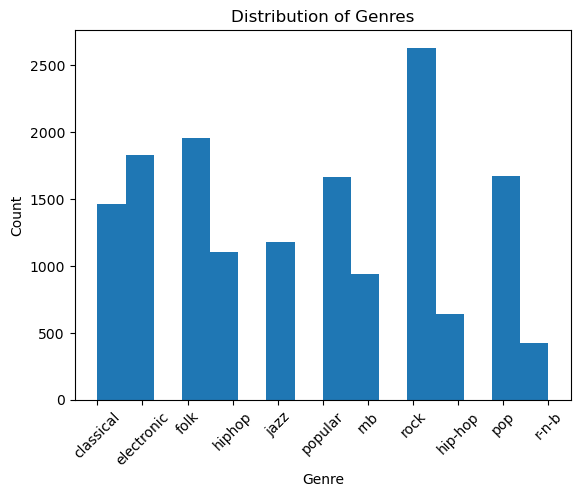

In [85]:
plt.figure()
plt.hist(spotify_concat['genre'], bins=16)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We still need to combine hip-hop, pop/popular and r-n-b.

In [86]:
spotify_concat['genre'] = spotify_concat['genre'].replace({'popular': 'pop'})
spotify_concat['genre'] = spotify_concat['genre'].replace({'hiphop': 'hip-hop'})
spotify_concat['genre'] = spotify_concat['genre'].replace({'rnb': 'r-n-b'})

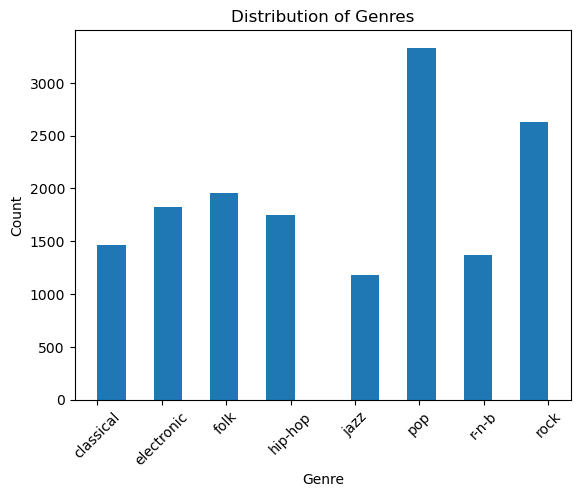

In [87]:
plt.figure()
plt.hist(spotify_concat['genre'], bins=16)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [88]:
spotify_concat['genre'].value_counts()

pop           3333
rock          2631
folk          1956
electronic    1826
hip-hop       1743
classical     1463
r-n-b         1368
jazz          1175
Name: genre, dtype: int64

We have some class imbalance which could lead to some issues whent training our model. Let's continue to run some basline models. 

### Baseline Models - 7 genres 

For our baseline models, we will follow the same process that we did four 113-genre dataset and our 85-genre dataset. We will run classifiers with no specified hyperparameters to see where we stand with only 7 genres. 

In [89]:
# Train test split 
X = spotify_concat.select_dtypes(exclude='object')
y = spotify_concat['genre']

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# shape of our splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12396, 13) (3099, 13) (12396,) (3099,)


In [90]:
# Sanity check of our X_train columns 
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
10669,0.729,0.6910,5.0,-3.643,1.0,0.0337,0.668000,0.000000,0.1420,0.752,93.014,205093.0,4.0
5687,0.516,0.5950,5.0,-4.630,1.0,0.0313,0.027500,0.000000,0.1090,0.222,119.972,340707.0,4.0
10091,0.376,0.5740,7.0,-10.636,1.0,0.0575,0.942000,0.028300,0.3700,0.912,89.724,205689.0,3.0
14775,0.722,0.6760,11.0,-5.885,0.0,0.0829,0.000835,0.000012,0.3210,0.362,129.943,213426.0,4.0
5503,0.670,0.4760,9.0,-6.253,0.0,0.0406,0.328000,0.000000,0.1040,0.235,96.975,231907.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.383,0.5950,10.0,-5.908,0.0,0.0409,0.087500,0.000028,0.2380,0.235,104.194,208352.0,4.0
5192,0.659,0.6280,0.0,-8.685,0.0,0.1790,0.186000,0.000000,0.1050,0.262,94.050,219427.0,4.0
12290,0.336,0.3180,0.0,-11.412,1.0,0.0263,0.317000,0.071600,0.1110,0.240,79.660,459093.0,4.0
235,0.358,0.0344,9.0,-29.175,1.0,0.0382,0.989000,0.899000,0.0992,0.197,124.553,225144.0,3.0


In [99]:
y_train

10669    electronic
5687            pop
10091     classical
14775           pop
5503            pop
            ...    
905      electronic
5192            pop
12290          rock
235       classical
13498           pop
Name: genre, Length: 12396, dtype: object

This looks good. Let's start with a baseline logistic regression model. 

### Baseline Logistic Regression Model - 8 Genres 

In [100]:
# Instatiate model 
baseline_concat_log = LogisticRegression(max_iter=10000)

# Fit the model 
baseline_concat_log.fit(X_train, y_train)

# Score on training data 
print(baseline_concat_log.score(X_train, y_train))

# Score on testing data 
print(baseline_concat_log.score(X_test, y_test))

0.22362052274927396
0.2281381090674411


We can already see that our basline Logistic Regression model is doing much better than our 85-genre and 113-genre datasets with little to no overfitting. 

| Baseline Model - 7 Genres      | Train Score | Test Score |
|--------------------------------|-------------|------------|
| Logistic Regression            | 22.4%       | 22.8%      |


### Baseline Decision Tree Classifier - 8 Genres 

In [104]:
# instantiate model 
baseline_concat_DT = DecisionTreeClassifier()

# fit model 
baseline_concat_DT.fit(X_train, y_train)

print(f'Train Score: {baseline_concat_DT.score(X_train, y_train)}')
print(f'Test Score: {baseline_concat_DT.score(X_test, y_test)}')

Train Score: 0.9972571797353985
Test Score: 0.40174249757986447


Once again, we can see a much better test performance than our previous baseline models - an improvement of about 20%. 

| Baseline Model - 7 Genres      | Train Score | Test Score |
|--------------------------------|-------------|------------|
| Logistic Regression            | 22.4%       | 22.8%      |
| Decision Tree                  | 99.7%       | 40.2%      |


### Baseline Random Forest - 8 Genres 

In [105]:
RF_concat_model = RandomForestClassifier(n_estimators=100) 
RF_concat_model.fit(X_train, y_train)
 
#plot_decision_regions(X_train, y_train, clf=random_forest_model);

print(RF_concat_model.score(X_train, y_train))
print(RF_concat_model.score(X_test, y_test))

0.9972571797353985
0.5514682155534043


Here we can see a 12% increase in test performance in comparison to our previous models. 

| Baseline Model - 7 Genres      | Train Score | Test Score |
|--------------------------------|-------------|------------|
| Logistic Regression            | 22.4%       | 22.8%      |
| Decision Tree                  | 99.7%       | 40.2%      |
| Random Forest                  | 99.7%       | 55.1%      |

### Basline KNN - 8 Genres

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn_concat_model = KNeighborsClassifier()
knn_concat_model.fit(X_train, y_train)

print("Number of neighbors: ", knn_concat_model.n_neighbors)
print("Train Accuracy: ", knn_concat_model.score(X_train, y_train))
print("Test Accuracy: ", knn_concat_model.score(X_test, y_test))


Number of neighbors:  5


/Users/stephaniebarrett/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Accuracy:  0.43796385930945464
Test Accuracy:  0.1903839948370442


/Users/stephaniebarrett/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Following the patters of our other baseline KNN models, we can see some underfitting with low train and test performance. 

| Baseline Model - 8 Genres      | Train Score | Test Score |
|--------------------------------|-------------|------------|
| Logistic Regression            | 22.4%       | 22.8%      |
| Decision Tree                  | 99.7%       | 40.2%      |
| Random Forest                  | 99.7%       | 55.1%      |
| KNN                            | 43.8        | 19.03      |

We can see overall improvement in the performance with less genres. Let's see if we can optimize our Random Forest to get a higher test score while simultaneously reducing the amount of overfitting. 

Let's look for the range of n_estimators for the Random Forest Classifier that will go in our grid search. 

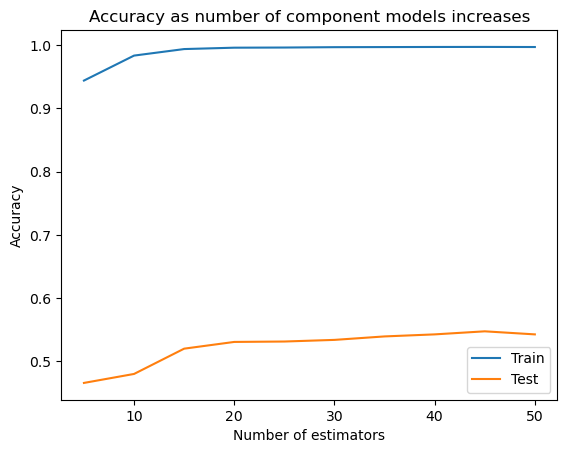

In [112]:
train_scores = []
test_scores = []
n_range = range(5, 51, 5) #5 tree -> forest .... 100 trees -> forest
for n in n_range:
    RF_concat_model = RandomForestClassifier(n_estimators = n)
    RF_concat_model.fit(X_train, y_train)
    train_scores.append(RF_concat_model.score(X_train, y_train))
    test_scores.append(RF_concat_model.score(X_test, y_test))
    
plt.plot(n_range, train_scores, label = 'Train')
plt.plot(n_range, test_scores, label = 'Test')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy as number of component models increases")
plt.legend();

In [59]:
test_acc_concat = []
train_acc_concat = []


for depth in range(1,41): 
    #Fit to the training data
    RF_concat_model = RandomForestClassifier(max_depth=depth)
    RF_concat_model.fit(X_remainder, y_remainder)
    
    print(f"DEPTH: {depth}")
    print(f"The TRAIN classification accuracy is:  {RF_concat_model.score(X_remainder,y_remainder)}")
    train_acc_concat.append(RF_concat_model.score(X_remainder,y_remainder))
    print(f"The TEST classification accuracy is:  {RF_concat_model.score(X_test,y_test)}", "\n\n")
    test_acc_concat.append(RF_concat_model.score(X_test,y_test))

DEPTH: 1
The TRAIN classification accuracy is:  0.109197086403215
The TEST classification accuracy is:  0.10925073252406865 


DEPTH: 2
The TRAIN classification accuracy is:  0.15032652377762892
The TEST classification accuracy is:  0.14742570113018 


DEPTH: 3
The TRAIN classification accuracy is:  0.19627009377093102
The TEST classification accuracy is:  0.19489326077856844 


DEPTH: 4
The TRAIN classification accuracy is:  0.25071165438714
The TEST classification accuracy is:  0.2463792381749686 


DEPTH: 5
The TRAIN classification accuracy is:  0.2866920629604823
The TEST classification accuracy is:  0.28170782754290496 


DEPTH: 6
The TRAIN classification accuracy is:  0.3239074012056263
The TEST classification accuracy is:  0.30925073252406865 


DEPTH: 7
The TRAIN classification accuracy is:  0.3527503348961822
The TEST classification accuracy is:  0.33151946421096695 


DEPTH: 8
The TRAIN classification accuracy is:  0.38429336905559275
The TEST classification accuracy is:  0.3

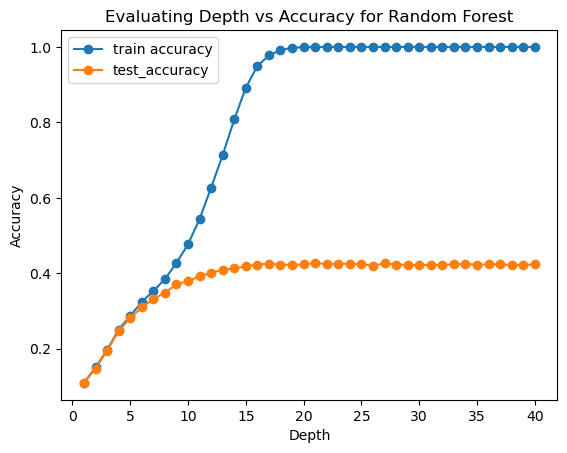

In [60]:
plt.plot(range(1,41), train_acc_concat, marker="o", label="train accuracy") 
plt.plot(range(1,41), test_acc_concat, marker="o", label="test_accuracy")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Evaluating Depth vs Accuracy for Random Forest")
plt.show()

We can see that based on the above visualizations that the best n_estimators for our Random Forest is in between 40 and 50. The accuracy does not improve after that. 

The best values for our max depth parameter are, once again, between 8 and 12. 

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

In [62]:
# Our placeholders 
estimators = [
            ('scaler', StandardScaler()),
            ('dim_reducer', PCA()), 
            ('model', RandomForestClassifier())
             ]

my_pipe = Pipeline(estimators)

#Note: still can't use TSNE here because it doesn't have .transform() save for clustering

In [63]:
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler(), None],
        'model': [RandomForestClassifier(n_estimators=50)], #Choosing 50 because performance stopped improving after 50 trees 
        'dim_reducer__n_components': [2, 3, 4],
        'model__criterion': ['gini', 'entropy'],
        'model__max_features': [2,4,6, None],
        #'model__min_samples_leaf': [1,2,3], 
        'model__min_samples_split': [2,3],
        'model__n_jobs': [-1],
        'model__max_depth': [8,10,12, None] # Does this not matter as much in a random forest? 
    }
]
    
grid = GridSearchCV(my_pipe, param_grid, cv=5)

fittedgrid = grid.fit(X_train, y_train)

In [64]:
fittedgrid.best_params_


{'dim_reducer__n_components': 4,
 'model': RandomForestClassifier(max_depth=12, max_features=2, min_samples_split=3,
                        n_estimators=50, n_jobs=-1),
 'model__criterion': 'gini',
 'model__max_depth': 12,
 'model__max_features': 2,
 'model__min_samples_split': 3,
 'model__n_jobs': -1,
 'scaler': None}

In [65]:
# With PCA 
estimators = [
              ('dim_reducer', PCA(n_components=4)),
              ('rf', RandomForestClassifier(max_features=2, min_samples_split=3, n_estimators=50, criterion='gini', max_depth=12, n_jobs=-1))
             ]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)
print(f'train score: {pipe.score(X_train,y_train)}')
print(f'test score: {pipe.score(X_test, y_test)}')

train score: 0.40323593436034827
test score: 0.3732942653830054


In [132]:
# Without PCA 
estimators = [
              ('normalise', MinMaxScaler()), 
              ('rf', RandomForestClassifier(max_features=2, min_samples_split=2, n_estimators=50, criterion='entropy'))
             ]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)
print(f'train score: {pipe.score(X_train,y_train)}')
print(f'test score: {pipe.score(X_test, y_test)}')

train score: 0.9972571797353985
test score: 0.5321071313326879


In [92]:
# Without PCA and without min_samples_split
estimators = [
              ('normalise', MinMaxScaler()), 
              ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy'))
             ]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)
print(f'train score: {pipe.score(X_train,y_train)}')
print(f'test score: {pipe.score(X_test, y_test)}')

train score: 0.9970958373668926
test score: 0.547918683446273


Even though our model is doing better than a a random guess when it comes to classifying genre, the best score our model can get before it starts to overfit is similar to the scores of our 85-genre dataset - 37%. The reduction in genres yieled better baseline model performance, but not without a severe amount of overfitting. It could be that the attributes we have for each song are not good indicators of what constitutes a song belonging to a particular genre. 

We can look at the importance of each feature below. Feature importance can tell us how important a feature is in predicting a target variable. The ratios below are in between 0 and 1. 

In [57]:
importances = pipe['rf'].feature_importances_

In [58]:
importances

array([0.21572218, 0.07761236, 0.01755043, 0.09093317, 0.08853536,
       0.00272922, 0.07815148, 0.0078353 , 0.04948133, 0.13203898,
       0.09256611, 0.0269781 , 0.07210356, 0.04080395, 0.00695846])

We can see below that none of the features contributed greatly to predicting our target varibale, genre. This makes sense given our low model performance. The features that contributed the most were `danceability` and `valence`. 

### CONCLUSIONS AND NEXT STEPS 

So far, we have been unsuccessful in predicting the genre of a song based on our given attributes. A Random Forest performed the best out of the models we've run so far. Random Forests have great "out-of-the-box" performance but can be harder to optimize. Our optimization of the hyperparamters did not lead to improved performance. The best perfomance we could get between both 85-genre and 7-genre datasets was between 35-38% before the models started to overfit. Next steps in modeling could be to try Neural Networks and add sound clips and/or visual representations of each song. Datasets like this exist using different metrics. 

Initially, before reducing the number of genres from 113 to 85 to 8, we had thought about using clustering to find a way to quantify grouping certain genres together given the similarity between many of our genres. However, our PCA and k-means led to unexpected results. Notebook 4 contains our PCA and k-means.

***
**TABLE OF CONTENTS**

[Introduction](#Modeling-&-Hyperparameter-Optimization)

[Loading and Checking our Cleaned Data](#LOADING-AND-CHECKING-OUR-CLEANED-DATA)

[Baseline Models - 113 Genres](#BASELINE-MODELS)

[Baseline Models - 85 Genres](#BASELINE-MODELS---85-GENRES)

[Hyperparameter Optimization of Random Forest Model](#HYPERPARAMETER-OPTIMIZATION-OF-RANDOM-FOREST)

[Combining Datasets for Total of 8 Genres](#COMBINING-DATASETS-FOR-A-TOTAL-OF-8-GENRES) 

[Conclusions & Next Steps](#CONCLUSIONS-AND-NEXT-STEPS)

***